In [5]:
import os
import cv2


In [2]:
path = '/projects/data/asl-citizen/ASL_Citizen/ASLCitizen'

In [4]:
videos = os.listdir(path)

In [10]:
shapes_list = []
for video in videos:
    cap = cv2.VideoCapture(os.path.join(path,video))
    ret, frame = cap.read()
    if ret:
        frame_shape = frame.shape
        aspect_ratio = frame_shape[1]/frame_shape[0]
        # print(frame_shape[1]/frame_shape[0])
        shapes_list.append(aspect_ratio)

KeyboardInterrupt: 

In [16]:
import multiprocessing as mp
def get_info(video):
    cap = cv2.VideoCapture(os.path.join(path, video))
    ret , frame= cap.read()
    cap.release()
    if ret:
        aspect_ratio = frame.shape[1]/frame.shape[0]

        return frame.shape[0]
    else:
        return 1

with mp.Pool(mp.cpu_count()) as pool:
    size = pool.map(get_info, videos)


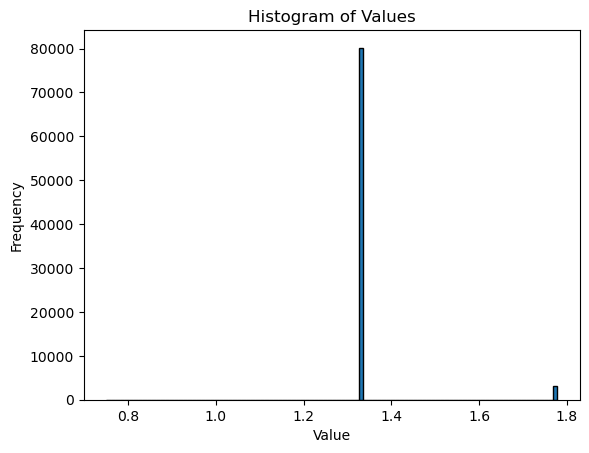

In [12]:
import matplotlib.pyplot as plt


# Plot the histogram
plt.hist(results, bins=100, edgecolor='black')

# Add titles and labels
plt.title('Histogram of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [19]:
import numpy as np

def get_histogram_from_unique_values(values):
    """
    Computes the histogram from a list of values using unique values as bin edges,
    and returns the histogram counts and bin edges as lists.
    
    Parameters:
    - values: List of numerical values.
    
    Returns:
    - hist_counts: List of counts for each bin.
    - bin_edges: List of bin edges.
    """
    # Compute unique values and sort them
    unique_values = np.unique(values)
    
    # Add one more bin edge to cover the range properly
    bin_edges = np.append(unique_values, unique_values[-1] + 1)
    
    # Compute the histogram
    hist_counts, bin_edges = np.histogram(values, bins=bin_edges)
    
    # Convert to lists
    hist_counts = hist_counts.tolist()
    bin_edges = bin_edges.tolist()
    
    return hist_counts, bin_edges

# Example usage
hist_counts, bin_edges = get_histogram_from_unique_values(results)

print("Histogram counts:", hist_counts)
print("Bin edges:", bin_edges)


Histogram counts: [4, 80184, 3211]
Bin edges: [0.75, 1.3333333333333333, 1.7777777777777777, 2.7777777777777777]


In [15]:
np.unique(results)

array([0.75      , 1.33333333, 1.77777778])

In [17]:
np.unique(size)

array([480, 540, 640])